#Primer Modelo - Regresion Polinomica

##Nombre: Jhamil Crespo Rejas
##Carrera: Ingenieria en Ciencias de la Computacion

##Importacion de Librerias

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
# utilizado para manejos de directorios y rutas
import os
#utilizado para importar y ordenar los datos del DATASET
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np

# Modulo de optimizacion en scipy
from scipy import optimize

from sklearn.model_selection import train_test_split

# Librerias para graficar
from matplotlib import pyplot

from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

##Analisis del Dataset

El dataset contiene información sobre las opciones de reserva de vuelos del sitio web Easemytrip para viajes en avión entre las 6 principales ciudades metropolitanas de la India. Hay 300261 puntos de datos y 11 entidades en el dataset limpio.

A pesar de que nos indica que el dataset ya esta limpio, debemos modificar algunas cosas antes de poder entrenar el modelo.

Extraemos el dataset y lo almacenamos en un dataframe con ayuda de pandas

In [151]:
dataframe = pd.read_csv('/content/drive/MyDrive/Primer Parcial - IA/Datasets/Clean_Dataset.csv')
print(dataframe.sample(n=200))

        Unnamed: 0    airline  flight source_city departure_time stops  \
286741      286741    Vistara  UK-880   Hyderabad      Afternoon   one   
165718      165718    Vistara  UK-878   Hyderabad      Afternoon   one   
263391      263391    Vistara  UK-774     Kolkata          Night   one   
286933      286933  Air_India  AI-840   Hyderabad          Night   one   
233758      233758    Vistara  UK-996      Mumbai        Evening   one   
...            ...        ...     ...         ...            ...   ...   
20826        20826   GO_FIRST  G8-330       Delhi          Night   one   
5689          5689    Vistara  UK-706       Delhi      Afternoon   one   
201593      201593     Indigo  6E-606     Chennai        Evening  zero   
155467      155467   GO_FIRST  G8-571   Hyderabad          Night   one   
199118      199118    Vistara  UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price  
286741          Night          C

###Cambio de texto a numeros

Varias de las caracteristicas de este dataset contienen datos categoricos, y para entrenar al modelo necesitamos convertir estos datos a una equivalencia numerica

####airline

In [152]:
airline_unicos = dataframe['airline'].unique() #Obtenemos todos los valores unicos de la columna 'airline'

#Mostramos la lista de valores unicos y la cantidad de estos
print(airline_unicos)
print(len(airline_unicos))

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
6


In [153]:
#Se asigna valores numericos a cada uno de los trabajos
airline_ordinal_map = {
    'SpiceJet': 1,
    'AirAsia': 2,
    'Vistara': 3,
    'GO_FIRST': 4,
    'Indigo': 5,
    'Air_India': 6
}

# Se aplica el mapeo a la columna 'airline' y se crea una nueva columna 'airline_ordinal' con los valores numericos respectivos
dataframe['airline_ordinal'] = dataframe['airline'].map(airline_ordinal_map)

#Quitamos la columna 'airline'
dataframe.drop('airline', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   Unnamed: 0   flight source_city departure_time stops   arrival_time  \
0           0  SG-8709       Delhi        Evening  zero          Night   
1           1  SG-8157       Delhi  Early_Morning  zero        Morning   
2           2   I5-764       Delhi  Early_Morning  zero  Early_Morning   
3           3   UK-995       Delhi        Morning  zero      Afternoon   
4           4   UK-963       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  airline_ordinal  
0           Mumbai  Economy      2.17          1   5953                1  
1           Mumbai  Economy      2.33          1   5953                1  
2           Mumbai  Economy      2.17          1   5956                2  
3           Mumbai  Economy      2.25          1   5955                3  
4           Mumbai  Economy      2.33          1   5955                3  


####flight

In [154]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

In [155]:
flight_unicos = dataframe['flight'].unique() #Obtenemos todos los valores unicos de la columna 'flight'

#Mostramos la lista de valores unicos y la cantidad de estos
print(flight_unicos)
print(len(flight_unicos))

['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
1561


In [156]:
#asignamos valores numericos equivalentes
flight_cat = dataframe[['flight']]
dataframe['flight_ordinal'] = ordinal_encoder.fit_transform(flight_cat)


#Quitamos la columna 'marital'
dataframe.drop('flight', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   Unnamed: 0 source_city departure_time stops   arrival_time  \
0           0       Delhi        Evening  zero          Night   
1           1       Delhi  Early_Morning  zero        Morning   
2           2       Delhi  Early_Morning  zero  Early_Morning   
3           3       Delhi        Morning  zero      Afternoon   
4           4       Delhi        Morning  zero        Morning   

  destination_city    class  duration  days_left  price  airline_ordinal  \
0           Mumbai  Economy      2.17          1   5953                1   
1           Mumbai  Economy      2.33          1   5953                1   
2           Mumbai  Economy      2.17          1   5956                2   
3           Mumbai  Economy      2.25          1   5955                3   
4           Mumbai  Economy      2.33          1   5955                3   

   flight_ordinal  
0          1408.0  
1          1387.0  
2          1213.0  
3          1559.0  
4          1549.0  


####source_city

In [157]:
source_city_unicos = dataframe['source_city'].unique() #Obtenemos todos los valores unicos de la columna 'source_city'

#Mostramos la lista de valores unicos y la cantidad de estos
print(source_city_unicos)
print(len(source_city_unicos))

['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
6


In [158]:
#Se asigna valores numericos a cada uno de los valores unicos
source_city_ordinal_map = {
    'Delhi': 1,
    'Mumbai': 2,
    'Bangalore': 3,
    'Kolkata': 4,
    'Hyderabad': 5,
    'Chennai': 6
}

# Se aplica el mapeo a la columna 'source_city' y se crea una nueva columna 'source_city_ordinal' con los valores numericos respectivos
dataframe['source_city_ordinal'] = dataframe['source_city'].map(source_city_ordinal_map)

#Quitamos la columna 'source_city'
dataframe.drop('source_city', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   Unnamed: 0 departure_time stops   arrival_time destination_city    class  \
0           0        Evening  zero          Night           Mumbai  Economy   
1           1  Early_Morning  zero        Morning           Mumbai  Economy   
2           2  Early_Morning  zero  Early_Morning           Mumbai  Economy   
3           3        Morning  zero      Afternoon           Mumbai  Economy   
4           4        Morning  zero        Morning           Mumbai  Economy   

   duration  days_left  price  airline_ordinal  flight_ordinal  \
0      2.17          1   5953                1          1408.0   
1      2.33          1   5953                1          1387.0   
2      2.17          1   5956                2          1213.0   
3      2.25          1   5955                3          1559.0   
4      2.33          1   5955                3          1549.0   

   source_city_ordinal  
0                    1  
1                    1  
2                    1  
3                    1  
4  

####departure_time

In [159]:
departure_time_unicos = dataframe['departure_time'].unique() #Obtenemos todos los valores unicos de la columna 'departure_time'

#Mostramos la lista de valores unicos y la cantidad de estos
print(departure_time_unicos)
print(len(departure_time_unicos))

['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
6


In [160]:
#Se asigna valores numericos a cada uno de los valores unicos
departure_time_ordinal_map = {
    'Evening': 1,
    'Early_Morning': 2,
    'Morning': 3,
    'Afternoon': 4,
    'Night': 5,
    'Late_Night': 6
}

# Se aplica el mapeo a la columna 'departure_time' y se crea una nueva columna 'departure_time_ordinal' con los valores numericos respectivos
dataframe['departure_time_ordinal'] = dataframe['departure_time'].map(departure_time_ordinal_map)

#Quitamos la columna 'departure_time'
dataframe.drop('departure_time', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   Unnamed: 0 stops   arrival_time destination_city    class  duration  \
0           0  zero          Night           Mumbai  Economy      2.17   
1           1  zero        Morning           Mumbai  Economy      2.33   
2           2  zero  Early_Morning           Mumbai  Economy      2.17   
3           3  zero      Afternoon           Mumbai  Economy      2.25   
4           4  zero        Morning           Mumbai  Economy      2.33   

   days_left  price  airline_ordinal  flight_ordinal  source_city_ordinal  \
0          1   5953                1          1408.0                    1   
1          1   5953                1          1387.0                    1   
2          1   5956                2          1213.0                    1   
3          1   5955                3          1559.0                    1   
4          1   5955                3          1549.0                    1   

   departure_time_ordinal  
0                       1  
1                       2  
2       

####stops


In [161]:
stops_unicos = dataframe['stops'].unique() #Obtenemos todos los valores unicos de la columna 'stops'

#Mostramos la lista de valores unicos y la cantidad de estos
print(stops_unicos)
print(len(stops_unicos))

['zero' 'one' 'two_or_more']
3


In [162]:
#Se asigna valores numericos a cada uno de los valores unicos
stops_ordinal_map = {
    'zero': 1,
    'one': 2,
    'two_or_more': 3
}

# Se aplica el mapeo a la columna 'stops' y se crea una nueva columna 'stops' con los valores numericos respectivos
dataframe['stops_ordinal'] = dataframe['stops'].map(stops_ordinal_map)

#Quitamos la columna 'stops'
dataframe.drop('stops', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   Unnamed: 0   arrival_time destination_city    class  duration  days_left  \
0           0          Night           Mumbai  Economy      2.17          1   
1           1        Morning           Mumbai  Economy      2.33          1   
2           2  Early_Morning           Mumbai  Economy      2.17          1   
3           3      Afternoon           Mumbai  Economy      2.25          1   
4           4        Morning           Mumbai  Economy      2.33          1   

   price  airline_ordinal  flight_ordinal  source_city_ordinal  \
0   5953                1          1408.0                    1   
1   5953                1          1387.0                    1   
2   5956                2          1213.0                    1   
3   5955                3          1559.0                    1   
4   5955                3          1549.0                    1   

   departure_time_ordinal  stops_ordinal  
0                       1              1  
1                       2              1  

####arrival_time

In [163]:
arrival_time_unicos = dataframe['arrival_time'].unique() #Obtenemos todos los valores unicos de la columna 'arrival_time'

#Mostramos la lista de valores unicos y la cantidad de estos
print(arrival_time_unicos)
print(len(arrival_time_unicos))

['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
6


In [164]:
#Se asigna valores numericos a cada uno de los valores unicos
arrival_ordinal_map = {
    'Night': 1,
    'Morning': 2,
    'Early_Morning': 3,
    'Afternoon': 4,
    'Evening': 5,
    'Late_Night': 6
}

# Se aplica el mapeo a la columna 'arrival_time' y se crea una nueva columna 'arrival_time_ordinal' con los valores numericos respectivos
dataframe['arrival_time_ordinal'] = dataframe['arrival_time'].map(arrival_ordinal_map)

#Quitamos la columna 'arrival_time'
dataframe.drop('arrival_time', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   Unnamed: 0 destination_city    class  duration  days_left  price  \
0           0           Mumbai  Economy      2.17          1   5953   
1           1           Mumbai  Economy      2.33          1   5953   
2           2           Mumbai  Economy      2.17          1   5956   
3           3           Mumbai  Economy      2.25          1   5955   
4           4           Mumbai  Economy      2.33          1   5955   

   airline_ordinal  flight_ordinal  source_city_ordinal  \
0                1          1408.0                    1   
1                1          1387.0                    1   
2                2          1213.0                    1   
3                3          1559.0                    1   
4                3          1549.0                    1   

   departure_time_ordinal  stops_ordinal  arrival_time_ordinal  
0                       1              1                     1  
1                       2              1                     2  
2                      

####destination_city

In [165]:
destination_city_unicos = dataframe['destination_city'].unique() #Obtenemos todos los valores unicos de la columna 'destination_city'

#Mostramos la lista de valores unicos y la cantidad de estos
print(destination_city_unicos)
print(len(destination_city_unicos))

['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
6


In [166]:
#Se asigna valores numericos a cada uno de los valores unicos
destination_city_ordinal_map = {
    'Mumbai': 1,
    'Bangalore': 2,
    'Kolkata': 3,
    'Hyderabad': 4,
    'Chennai': 5,
    'Delhi': 6
}

# Se aplica el mapeo a la columna 'destination_city' y se crea una nueva columna 'destination_city_ordinal' con los valores numericos respectivos
dataframe['destination_city_ordinal'] = dataframe['destination_city'].map(destination_city_ordinal_map)

#Quitamos la columna 'destination_city'
dataframe.drop('destination_city', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   Unnamed: 0    class  duration  days_left  price  airline_ordinal  \
0           0  Economy      2.17          1   5953                1   
1           1  Economy      2.33          1   5953                1   
2           2  Economy      2.17          1   5956                2   
3           3  Economy      2.25          1   5955                3   
4           4  Economy      2.33          1   5955                3   

   flight_ordinal  source_city_ordinal  departure_time_ordinal  stops_ordinal  \
0          1408.0                    1                       1              1   
1          1387.0                    1                       2              1   
2          1213.0                    1                       2              1   
3          1559.0                    1                       3              1   
4          1549.0                    1                       3              1   

   arrival_time_ordinal  destination_city_ordinal  
0                     1           

####class

In [167]:
class_unicos = dataframe['class'].unique() #Obtenemos todos los valores unicos de la columna 'month'

#Mostramos la lista de valores unicos y la cantidad de estos
print(class_unicos)
print(len(class_unicos))

['Economy' 'Business']
2


In [168]:
#Se asigna valores numericos a cada uno de los valores unicos
class_ordinal_map = {
    'Economy': 1,
    'Business': 2
}

# Se aplica el mapeo a la columna 'class' y se crea una nueva columna 'class_ordinal' con los valores numericos respectivos
dataframe['class_ordinal'] = dataframe['class'].map(class_ordinal_map)

#Quitamos la columna 'class'
dataframe.drop('class', axis=1, inplace=True)

#verificamos
print(dataframe.head())

   Unnamed: 0  duration  days_left  price  airline_ordinal  flight_ordinal  \
0           0      2.17          1   5953                1          1408.0   
1           1      2.33          1   5953                1          1387.0   
2           2      2.17          1   5956                2          1213.0   
3           3      2.25          1   5955                3          1559.0   
4           4      2.33          1   5955                3          1549.0   

   source_city_ordinal  departure_time_ordinal  stops_ordinal  \
0                    1                       1              1   
1                    1                       2              1   
2                    1                       2              1   
3                    1                       3              1   
4                    1                       3              1   

   arrival_time_ordinal  destination_city_ordinal  class_ordinal  
0                     1                         1              1  
1     

###Correlacion

La correlación es una medida estadística que indica el grado de relación entre las variables. Necesitamos identificar:

* Variables independientes con una correlacion muy fuerte entre si
* Variables independientes con una correlacion muy debil con la variable dependiente

Estos deben ser eliminados ya que pueden afectar negativamente al entrenamiento del modelo

In [169]:
correlation_matrix = dataframe.corr()

# Imprime la matriz de correlación
print(correlation_matrix)

                          Unnamed: 0  duration  days_left     price  \
Unnamed: 0                  1.000000  0.159007   0.014638  0.761177   
duration                    0.159007  1.000000  -0.039157  0.204222   
days_left                   0.014638 -0.039157   1.000000 -0.091949   
price                       0.761177  0.204222  -0.091949  1.000000   
airline_ordinal             0.004282  0.066232  -0.010377 -0.052792   
flight_ordinal              0.211121  0.205502  -0.000443  0.305872   
source_city_ordinal         0.565243  0.063261   0.008704  0.026990   
departure_time_ordinal      0.056817 -0.016539   0.010374  0.002522   
stops_ordinal               0.047526  0.468059  -0.008540  0.119648   
arrival_time_ordinal       -0.021707 -0.025359   0.005739 -0.031176   
destination_city_ordinal    0.012970 -0.018264   0.005919 -0.036952   
class_ordinal               0.802099  0.138710  -0.013039  0.937860   

                          airline_ordinal  flight_ordinal  \
Unnamed: 0     

In [170]:
#Eliminamos las caracyeristicas que presentan una correlacion muy cercana a cero en relacion con nuestra variable dependiente 'job_ordinal'
dataframe.drop('Unnamed: 0', axis=1, inplace=True) #eliminamos la numeracion
dataframe.drop('departure_time_ordinal', axis=1, inplace=True)

###Verificamos si hay nulos

In [171]:
print(dataframe.isnull().sum())

duration                    0
days_left                   0
price                       0
airline_ordinal             0
flight_ordinal              0
source_city_ordinal         0
stops_ordinal               0
arrival_time_ordinal        0
destination_city_ordinal    0
class_ordinal               0
dtype: int64


##Modelo - Regresion Polinomica

Para un modelo de regresion polinomica el calculo de la hipotesis en diferente al de una regresion lineal. La cantidad de thetas aumenta considerablemente dependiendo de la **cantidad de caracteristicas de X** y del **grado del polinomio** con el que querramos trabajar:

En este caso trabajaremos con un polinomio de segundo grado.

Para calcular la hipotesis necesitamos calcular 3 matrices:

* La matriz de las características simples
* La matriz de las características al cuadrado (2do grado)
* La matriz de las combinaciones de todas las características.

Primero realizaremos algunas modificaciones.

Dividimos el dataframe entre las variables independientes y la variable dependiente

In [172]:
y = dataframe['price']
X = dataframe.drop(columns=['price'])

In [173]:
print(X.head())
print(y.head())

   duration  days_left  airline_ordinal  flight_ordinal  source_city_ordinal  \
0      2.17          1                1          1408.0                    1   
1      2.33          1                1          1387.0                    1   
2      2.17          1                2          1213.0                    1   
3      2.25          1                3          1559.0                    1   
4      2.33          1                3          1549.0                    1   

   stops_ordinal  arrival_time_ordinal  destination_city_ordinal  \
0              1                     1                         1   
1              1                     2                         1   
2              1                     3                         1   
3              1                     4                         1   
4              1                     2                         1   

   class_ordinal  
0              1  
1              1  
2              1  
3              1  
4              

Dividimos los datos en conjuntos para entrenamiento y para prueba, indicando que se usara el 80% para entrenar y el resto para probar.

In [174]:
# Dividimos los datos en conjuntos para entrenamiento y para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [175]:
print(len(X_train))
print(len(y_train))

240122
240122


Pasamos los datos del DataFrame a un array de NumPy


In [176]:
X_trainNp = X_train.values #Esta ya seria la primera matriz que necesitamos
y_trainNp= y_train.values

In [177]:
print(X_trainNp.shape[1])#cantidad de caracteristicas

9


Calculamos la matriz de los elementos al cuadrado

In [178]:
X_trainNpSquare=X_trainNp**2

Definimos una funcion que nos ayudara a calcular la matriz de todas las combinaciones posibles

In [179]:
def row_multiplications(row):
    n = len(row)
    result = [row[i] * row[j] for i in range(n) for j in range(i+1, n)]
    return result

# Aplicar la función a cada fila de la matriz original
X_trainNpCombinada = np.array([row_multiplications(row) for row in X_trainNp]) #Aca ya obtenemos la matriz combinada


Concatenamos las 3 matrices

In [180]:
X_trainNpCompleto = np.concatenate([X_trainNp, X_trainNpSquare,X_trainNpCombinada], axis=1)

Definimos la funcion que nos ayudara a noramlizar los valores

In [181]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)#calcula la media de cada columna
    sigma = np.std(X, axis = 0)#calcula la desviacion estandar de cada columna
    X_norm = (X - mu) / sigma #normaliza la matriz X (-1, 1)

    return X_norm, mu, sigma

In [182]:
# llama featureNormalize con los datos cargados
X_norm, muP, sigmaP = featureNormalize(X_trainNpCompleto)

print(X_trainNpCompleto)
print('Media calculada:', muP)
print('Desviación estandar calculada:', sigmaP)
print(X_norm)

[[ 2.08 22.    5.   ... 18.    3.    6.  ]
 [17.25 40.    3.   ... 16.    8.    8.  ]
 [17.42 41.    3.   ... 12.    4.   12.  ]
 ...
 [ 5.67 23.    5.   ...  4.    1.    4.  ]
 [19.33  2.    6.   ...  8.    8.    4.  ]
 [11.25  6.    4.   ...  5.    5.    1.  ]]
Media calculada: [1.22238784e+01 2.59981551e+01 4.05842030e+00 1.08843318e+03
 3.19962352e+00 1.92461749e+00 2.97094394e+00 3.42104847e+00
 1.31200806e+00 2.01132868e+02 8.59879266e+02 1.85979877e+01
 1.36697738e+06 1.30742956e+01 3.86214091e+00 1.18454910e+01
 1.48815394e+01 1.93602419e+00 3.13901337e+02 5.03017123e+01
 1.39363538e+04 3.98598634e+01 2.48619392e+01 3.59952861e+01
 4.15951012e+01 1.64971589e+01 1.05296920e+02 2.82960878e+04
 8.33811979e+01 4.99890556e+01 7.73505385e+01 8.90904665e+01
 3.40200273e+01 3.94968798e+03 1.29867484e+01 7.79898552e+00
 1.20201689e+01 1.38356960e+01 5.32291502e+00 3.48370552e+03
 2.11781510e+03 3.20250573e+03 3.72551383e+03 1.47959448e+03
 6.19725390e+00 9.55507201e+00 1.09831419e+01 4.

Concatenamos la columna de unos a X_trainNpCompleto

In [183]:
m = y_trainNp.size
X_trainNpCompleto = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [184]:
def computeCostMulti(X_train, y_train, theta):
    # Inicializa algunos valores utiles
    m = y_train.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X_train, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X_train, theta) - y_train))

    return J

In [185]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Calculamos el costo de la regresion lineal a traves de la funcion computeCostMulti

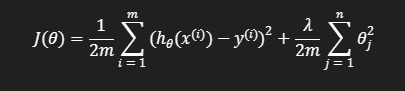

Y el descenso por el gradiente con la funcion gradientDescentMulti que nos ayuda a actualizar theta

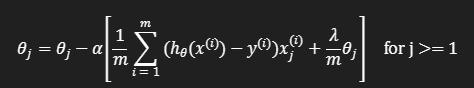

In [ ]:
def computeCostMultiRegularizado(X, y, theta, lambda_):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    h = np.dot(X, theta) #calcula la hipotesis

    # Agrega el término de regularización al costo (excepto para theta[0])
    temp = theta
    temp[0] = 0
    J = (1/(2 * m)) * np.sum(np.square(h - y)) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    return J


In [ ]:
def gradientDescentMultiRegularizado(X, y, theta, alpha, num_iters, lambda_):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = [] #almacena los valores de la funcion de costo de cada iteracion

    for i in range(num_iters):
        h = np.dot(X, theta)
        grad = (1 / m) * (h - y).dot(X)

        # Agrega el término de regularización al gradiente (excepto para theta[0])
        grad[1:] = grad[1:] + (lambda_ / m) * theta[1:]

        # Actualiza theta
        theta = theta - alpha * grad

        # Calcula el costo con regularización y lo agrega a la historia del costo
        J = computeCostMultiRegularizado(X, y, theta, lambda_)
        J_history.append(J)

    return theta, J_history

In [186]:
print(X_trainNpCompleto.shape[1])

55


lamamos a la funcion del descenso por el gradiente y graficamos la convergencia del costo (J).

theta calculado por el descenso por el gradiente: [ 2.07710453e+04 -7.78856036e+01 -7.93164818e+02  1.45741330e+02
 -2.43839414e+02 -7.60599029e+01  2.81496391e+02 -1.74459432e+02
 -1.07361385e+02  4.20213203e+03 -8.05424793e+02  5.11409536e+02
 -3.01340058e+02  6.13163320e+02 -5.13484077e+02 -5.12430212e+02
  1.69999154e+02 -2.44140665e+02  4.20213203e+03 -5.05593148e+02
 -1.84815791e+01  4.11811309e+02 -1.90326419e+02 -4.52346311e+02
 -5.74238710e+01 -2.44475222e+02  2.55819384e+03 -4.99310311e+02
 -8.09586545e+02 -3.93690259e+02 -7.39786768e+02 -4.33138612e+02
 -3.08225215e+02  1.61010143e+03 -5.50108375e+02  2.24334272e+02
  3.23514385e+02  6.93387334e+01  6.55391215e+01  1.02970001e+03
 -3.96221757e+02  6.44311842e+02 -5.36356260e+02 -6.02836420e+02
  4.10352598e+03 -1.42205587e+02 -1.39993505e+02 -1.78820906e+00
  1.98224360e+03 -1.73673746e+02 -3.36942743e+01  5.62510587e+03
 -1.72579783e+01  1.13279903e+03  7.61996173e+02]


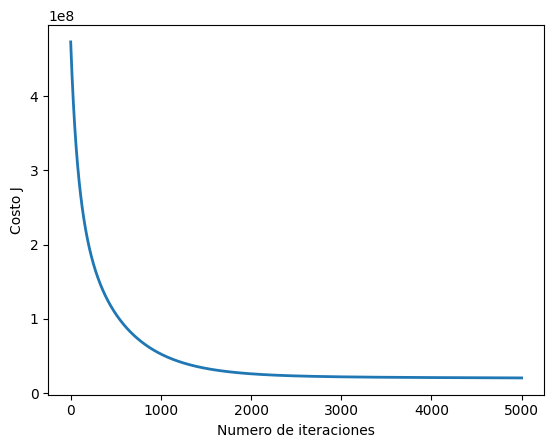

In [187]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001 # alpha = 0.003
num_iters = 5000
#lambda_ = 0.1

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(55)
theta, J_history = gradientDescentMulti(X_trainNpCompleto, y_trainNp, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

Preparamos los datos para la prueba de prediccion

In [188]:
X_testNp=X_test.values

In [189]:
Y_testNp=y_test.values

Realizamos el mismo procedimiento para X_testNp que el que hicimos con X_trainNp. Calculamos las 2 matrices qeu nos faltan

In [190]:
X_tstPSquare=X_testNp**2
# Aplicar la función a cada fila de la matriz original
X_testNpCombinado = np.array([row_multiplications(row) for row in X_testNp])
print(X_testNpCombinado[:10])

[[6.698300e+02 8.202000e+01 1.156482e+04 5.468000e+01 2.734000e+01
  2.734000e+01 1.367000e+01 1.367000e+01 2.940000e+02 4.145400e+04
  1.960000e+02 9.800000e+01 9.800000e+01 4.900000e+01 4.900000e+01
  5.076000e+03 2.400000e+01 1.200000e+01 1.200000e+01 6.000000e+00
  6.000000e+00 3.384000e+03 1.692000e+03 1.692000e+03 8.460000e+02
  8.460000e+02 8.000000e+00 8.000000e+00 4.000000e+00 4.000000e+00
  4.000000e+00 2.000000e+00 2.000000e+00 2.000000e+00 2.000000e+00
  1.000000e+00]
 [6.688000e+01 3.040000e+01 1.398400e+02 1.824000e+01 1.216000e+01
  3.040000e+01 6.080000e+00 6.080000e+00 5.500000e+01 2.530000e+02
  3.300000e+01 2.200000e+01 5.500000e+01 1.100000e+01 1.100000e+01
  1.150000e+02 1.500000e+01 1.000000e+01 2.500000e+01 5.000000e+00
  5.000000e+00 6.900000e+01 4.600000e+01 1.150000e+02 2.300000e+01
  2.300000e+01 6.000000e+00 1.500000e+01 3.000000e+00 3.000000e+00
  1.000000e+01 2.000000e+00 2.000000e+00 5.000000e+00 5.000000e+00
  1.000000e+00]
 [1.897500e+02 1.650000e+01 9.

Concatenamos las tres matrices

In [191]:
X_testNpCompleto = np.concatenate([X_testNp, X_tstPSquare,X_testNpCombinado], axis=1)

Normalizamos la matriz completa

In [192]:
# llama featureNormalize con los datos cargados
X_testNorm, mut, sigmat = featureNormalize(X_testNpCompleto)

print(X_testNpCompleto)
print('Media calculada:', mut)
print('Desviación estandar calculada:', sigmat)
print(X_testNorm)

[[13.67 49.    6.   ...  2.    2.    1.  ]
 [ 6.08 11.    5.   ...  5.    5.    1.  ]
 [ 8.25 23.    2.   ...  9.    3.    3.  ]
 ...
 [ 5.92 31.    3.   ... 36.   12.   12.  ]
 [ 7.42 46.    3.   ... 20.    5.    4.  ]
 [26.58  6.    6.   ...  1.    1.    1.  ]]
Media calculada: [1.22095905e+01 2.60311339e+01 4.06310073e+00 1.08795036e+03
 3.20894205e+00 1.92308974e+00 2.96591761e+00 3.41939998e+00
 1.30929020e+00 2.00858538e+02 8.61219320e+02 1.86441672e+01
 1.36481279e+06 1.31424098e+01 3.85875631e+00 1.18139461e+01
 1.48850760e+01 1.92787060e+00 3.14322735e+02 5.03156058e+01
 1.39107021e+04 4.00203278e+01 2.48381778e+01 3.59129198e+01
 4.14716248e+01 1.64584416e+01 1.05598507e+02 2.83124310e+04
 8.37388683e+01 5.00195066e+01 7.74365245e+01 8.91285669e+01
 3.40320168e+01 3.95339368e+03 1.30259699e+01 7.80500075e+00
 1.20282354e+01 1.38445303e+01 5.32115074e+00 3.49810223e+03
 2.11404424e+03 3.19101894e+03 3.72122925e+03 1.47461130e+03
 6.20799254e+00 9.54493512e+00 1.10101448e+01 4.

Adicionamos la columna de unos

In [193]:
mt = Y_testNp.size
X_testNorm = np.concatenate([np.ones((mt, 1)), X_testNorm], axis=1)
print(X_testNpCompleto)

[[13.67 49.    6.   ...  2.    2.    1.  ]
 [ 6.08 11.    5.   ...  5.    5.    1.  ]
 [ 8.25 23.    2.   ...  9.    3.    3.  ]
 ...
 [ 5.92 31.    3.   ... 36.   12.   12.  ]
 [ 7.42 46.    3.   ... 20.    5.    4.  ]
 [26.58  6.    6.   ...  1.    1.    1.  ]]


Realizamos la prediccion con los datos de prueba

In [194]:
prediccion = np.dot(X_testNorm, theta)
print(prediccion[:10])
print('-----------')
print(Y_testNp[:10])

[ 4160.28614806  7590.62690168  7903.13114567  3418.41457416
 53852.25161393 53537.80213155  5773.41465849 54628.86154893
 53321.09149541  5081.76738732]
-----------
[ 6048 13421  2836  1890 56588 53152  4942 54841 41269  5120]
